In [116]:
def ParameterizedCRInjection(alpha, beta, rmax, rconst, roff):

    r_list, src_dens = np.linspace(0,30,100), np.zeros(100)
    
    for i_r, r in enumerate(np.linspace(0,30,100)):
        x = r+roff
        x0 = 8.5+roff
        xconst = rconst+roff
        
        src_dens[i_r] = (x/x0)**alpha * np.exp(-beta*(x-x0)/x0)
        if r >= rconst:
            src_dens[i_r] = (xconst/x0)**alpha * np.exp(-beta*(xconst-x0/x0))
        elif r>=rmax:
            src_dens[i_r] = 0.0
    
    return r_list, src_dens
        
    
def SNR():
    r_list, src_dens = np.linspace(0,30,100), np.zeros(100)
    for i_r, r in enumerate(r_list):
        alpha=1.69;
        beta=3.33;
        ro=8.5;
        src_dens[i_r] = (r/ro)**alpha * exp(-beta*(r-ro)/ro)        
    return r_list, src_dens

def SNR():
    r_list, src_dens = np.linspace(0,30,100), np.zeros(100)
    for i_r, r in enumerate(r_list):
        alpha=1.69;
        beta=3.33;
        ro=8.5;
        src_dens[i_r] = (r/ro)**alpha * exp(-beta*(r-ro)/ro)
        
    return r_list, src_dens


def SNR2():
    # Eqn 15
    r_list, src_dens = np.linspace(0,30,100), np.zeros(100)
    for i_r, r in enumerate(r_list):
        A=1.96;
        beta=.13;
        r0=17.2;
        theta_0=.08
        
        if r<17.8:
            src_dens[i_r] = A*np.sin(np.pi*r/r0+theta_0)*np.exp(-beta*r)
        
    return r_list, src_dens


def NormAtSolarCircle(r_list, vals):
    solar_bin = np.argmin(np.abs(r_list-5))
    return r_list, vals/vals[solar_bin]
    
    
def OB():
    source_radius = [2.125, 2.975, 3.825, 4.675, 5.525, 6.375, 7.225, 8.075, 8.925, 9.775, 10.625, 11.475, 12.325, 13.175, 14.025, 14.875, 15.725, 16.575]
    source_values = [.17,  0.75,  1.44,  4.53,  4.26,  4.,    2.18,  2.,    2.31,  0.99,   0.53,   0.71,   0.41,   0.25,   0.1,    0.03,   0.04,   0.01]
    
    r_list = np.linspace(0,30,100)
    return r_list , np.interp(r_list, source_radius, source_values)
    
    
    

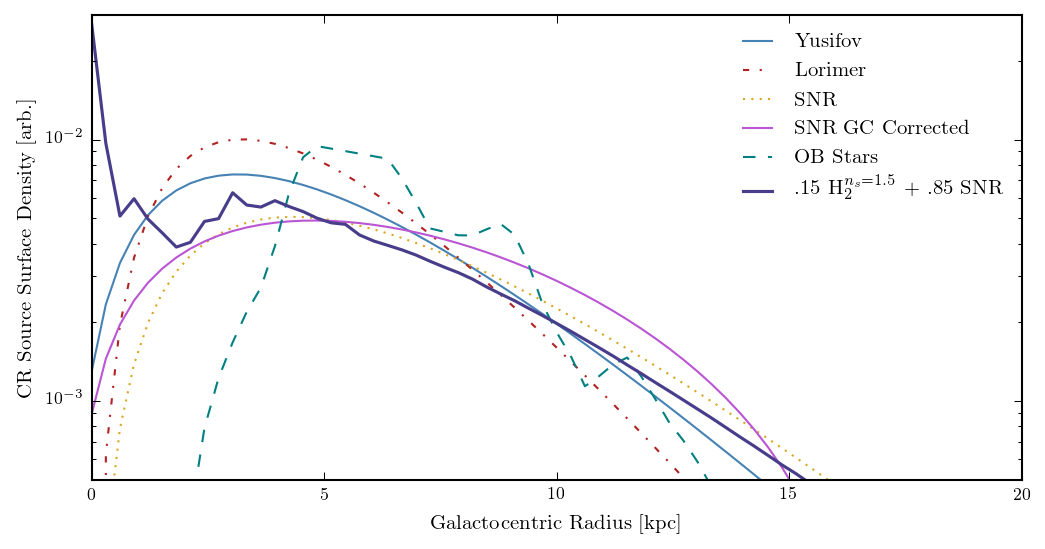

In [122]:
r, yusifov = ParameterizedCRInjection(alpha=1.64, beta=4.01, rmax=35., rconst=30., roff=0.55)
#r, yusifov = NormAtSolarCircle(r,yusifov)
yusifov = yusifov/np.sum(r*yusifov)


r, lorimer = ParameterizedCRInjection(alpha=1.9, beta=5., rmax=30., rconst=500., roff=0.)
#r, lorimer = NormAtSolarCircle(r,lorimer)
lorimer = lorimer/np.sum(r*lorimer)

r, snr = SNR()
snr = snr/np.sum(r*snr)

r, ob = OB()
ob = ob/np.sum(r*ob)

r, snr2 = SNR2()
snr2 = snr2/np.sum(r*snr2)

#r, ob = NormAtSolarCircle(r, ob)


plt.figure(figsize=(8,4))

plt.plot(r, yusifov, label='Yusifov')
plt.plot(r, lorimer, label='Lorimer', linestyle='-.')
plt.plot(r, snr,  label='SNR', linestyle=':')
plt.plot(r, snr2,  label='SNR GC Corrected', linestyle='-')
plt.plot(r, ob,  label='OB Stars', linestyle='--')


co_prof = radialprofile.azimuthalAverage(data,binsize=2.5)
r_CO, CO = np.linspace(0,15.884375,len(co_prof)), co_prof
CO = CO/np.sum(r_CO*np.nan_to_num(CO))

fh2_15 = 0.15*np.interp(r,r_CO,CO) + snr*.85

#plt.plot(r_CO,CO, label='H2', linewidth=1.5, c='k')
plt.plot(r, fh2_15, label='.15 H$_2^{n_s=1.5}$ + .85 SNR', linewidth=1.5)

plt.ylabel('CR Source Surface Density [arb.]')
plt.xlabel('Galactocentric Radius [kpc]')

plt.yscale('log')
plt.ylim(5e-4,3e-2)
plt.xlim(0,20)
plt.legend(frameon=False, fontsize=10)


plt.savefig('/home/carlson/Dropbox/OFFLINE_EDITS/gce_h2/plots/CR_sources.pdf', bbox_inches='tight')


('SIMPLE', True, 'Written by IDL:  Sun Mar 22 12:11:37 2009')
('BITPIX', -32, '16-bit twos complement binary integer')
('NAXIS', 3, 'Number of axes')
('NAXIS1', 300, '/ Number pixels on axis 1')
('NAXIS2', 300, '/ Number pixels on axis 2')
('NAXIS3', 40, '/ Number pixels on axis 3')
('CTYPE1', 'x IN PC', 'axis 1 coord type')
('CRVAL1', -15.884375, '/ coord value at CRPIX1')
('CDELT1', 0.10625, '/ pixel spacing for axis 1')
('CRPIX1', 1, '/ ref pixel for axis 1')
('CTYPE2', 'y IN PC', 'axis 2 coord type')
('CRVAL2', -15.884375, '/ coord value at CRPIX2')
('CDELT2', 0.10625, '/ pixel spacing for axis 2')
('CRPIX2', 1, '/ ref pixel for axis 2')
('CTYPE3', 'z IN PC', 'axis 3 coord type')
('CRVAL3', -0.51796875, '/ coord value at CRPIX3')
('CDELT3', 0.0265625, '/ pixel spacing for axis 3')
('CRPIX3', 1, '/ ref pixel for axis 3')
('HISTORY', 'Corrected for undersampling by Ke Fang, 03/18/09', '')
('COMMENT', 'deconvolution of CFA CO data cube by MKP', '')
('COMMENT', 'value is n_h2 in molecu

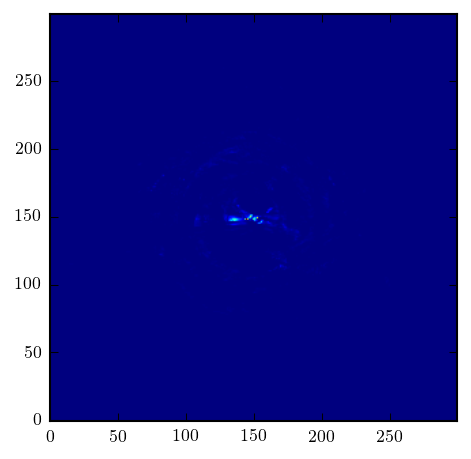

In [65]:
co = pyfits.open('/data/galprop2/FITS/CO_PEB_galprop_8500.fits.gz')
plt.imshow(np.sum(co[0].data**1.5, axis=0), origin='lower')
print co[0].header.cards

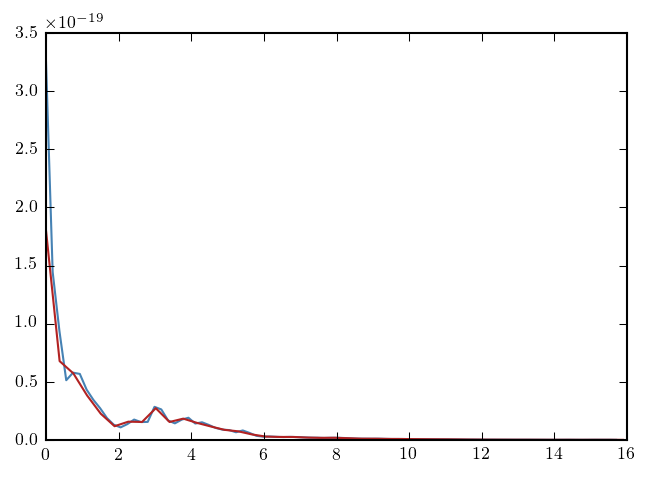

In [66]:
import radialprofile

data = np.sum(np.nan_to_num(co[0].data), axis=0).clip(0)
co_prof = radialprofile.azimuthalAverage(data,binsize=2.5)
r_list, CO = np.linspace(0,15.884375,len(co_prof)), co_prof
plt.plot(r_list, CO)

co_prof = radialprofile.azimuthalAverage(data,binsize=5)
r_list, CO = np.linspace(0,15.884375,len(co_prof)), co_prof
plt.plot(r_list, CO)